In [1213]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import numpy as np

In [1214]:
df = pd.read_csv('titanic_train.csv')

In [1215]:
df.shape

(891, 12)

### Exploring Data

In [1216]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [1218]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Handling Null Values

In [1219]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [1220]:
df[df['Age'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [1221]:
df['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [1222]:
# Filling age with mean of the all the people ages
age_mean = round(df.Age.mean(),0)
age_mean

np.float64(30.0)

In [1223]:
df['Age'] = df['Age'].fillna(age_mean) 
df['Age'].isna().sum()

np.int64(0)

In [1224]:
df[df['Age'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [1225]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [1226]:
df[df['Cabin'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,30.0,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,30.0,1,2,W./C. 6607,23.4500,NaN,S


In [1227]:
# Filling Cabin null values with mode
df[df['Cabin'].isin(df['Cabin'].mode())]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
205,206,0,3,"Strom, Miss. Telma Matilda",female,2.0,0,1,347054,10.4625,G6,S
251,252,0,3,"Strom, Mrs. Wilhelm (Elna Matilda Persson)",female,29.0,1,1,347054,10.4625,G6,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
390,391,1,1,"Carter, Mr. William Ernest",male,36.0,1,2,113760,120.0000,B96 B98,S
394,395,1,3,"Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengt...",female,24.0,0,2,PP 9549,16.7000,G6,S
435,436,1,1,"Carter, Miss. Lucile Polk",female,14.0,1,2,113760,120.0000,B96 B98,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S


In [1228]:
cabin_mode = df['Cabin'].mode()
cabin_mode

0        B96 B98
1    C23 C25 C27
2             G6
Name: Cabin, dtype: object

In [1229]:
df['Cabin'].isna().sum()

np.int64(687)

In [1230]:
# Filling cabin randomly 
import random as rd
df['Cabin'] = df['Cabin'].fillna(rd.choice(cabin_mode))

In [1231]:
df['Cabin'].isna().sum()

np.int64(0)

In [1232]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [1233]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [1234]:
df[df['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [1235]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [1236]:
emb_mode = df['Embarked'].mode()
df['Embarked'] = df['Embarked'].fillna(emb_mode[0])

In [1237]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

### Handling Inconsistent Formatting

In [1238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [1239]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,B96 B98,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,30.0,1,2,W./C. 6607,23.4500,B96 B98,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [1240]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [1241]:
df['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [1242]:
df['Ticket'] = df['Ticket'].str.replace(r'[./]','',regex=True)

In [1243]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STONO2 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,B96 B98,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,30.0,1,2,WC 6607,23.4500,B96 B98,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [1244]:
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [1245]:
# Mapping the Embarked column with the full form section
df['Embarked'] = df['Embarked'].map({
    'S' : 'Southampton',
    'C': 'Cherbourg',
    'Q' : 'Queenstown'
})

In [1246]:
df['Survived'] = df['Survived'].map({1 : 'Yes', 0: 'No'})

In [1247]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,No,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A5 21171,7.2500,B96 B98,Southampton
1,2,Yes,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg
2,3,Yes,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STONO2 3101282,7.9250,B96 B98,Southampton
3,4,Yes,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southampton
4,5,No,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,Southampton
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,No,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,B96 B98,Southampton
887,888,Yes,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,Southampton
888,889,No,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,30.0,1,2,WC 6607,23.4500,B96 B98,Southampton
889,890,Yes,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,Cherbourg


### Handling Duplicates

In [1248]:
df['PassengerId'].value_counts()

PassengerId
891    1
1      1
2      1
3      1
4      1
      ..
16     1
15     1
14     1
13     1
12     1
Name: count, Length: 891, dtype: int64

In [1249]:
df['Name'].value_counts()

Name
Dooley, Mr. Patrick                                    1
Braund, Mr. Owen Harris                                1
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    1
Heikkinen, Miss. Laina                                 1
Futrelle, Mrs. Jacques Heath (Lily May Peel)           1
                                                      ..
Hewlett, Mrs. (Mary D Kingcome)                        1
Vestrom, Miss. Hulda Amanda Adolfina                   1
Andersson, Mr. Anders Johan                            1
Saundercock, Mr. William Henry                         1
Bonnell, Miss. Elizabeth                               1
Name: count, Length: 891, dtype: int64

In [1250]:
df['Ticket'].value_counts()

Ticket
347082            7
1601              7
CA 2343           7
3101295           6
CA 2144           6
                 ..
PC 17590          1
17463             1
330877            1
373450            1
STONO2 3101282    1
Name: count, Length: 681, dtype: int64

#### There is no duplicates in this dataframe

### Changing Data types

In [1251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [1252]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,No,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A5 21171,7.2500,B96 B98,Southampton
1,2,Yes,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg
2,3,Yes,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STONO2 3101282,7.9250,B96 B98,Southampton
3,4,Yes,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southampton
4,5,No,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,Southampton


In [1253]:
df['PassengerId'] = df['PassengerId'].astype(object)
df['Age'] = round(df['Age'],0).astype(int)

In [1254]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    object 
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    int64  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(1), int64(4), object(7)
memory usage: 83.7+ KB


### Handling Outliers

In [1255]:
import seaborn as sns
import matplotlib as plt

<Axes: >

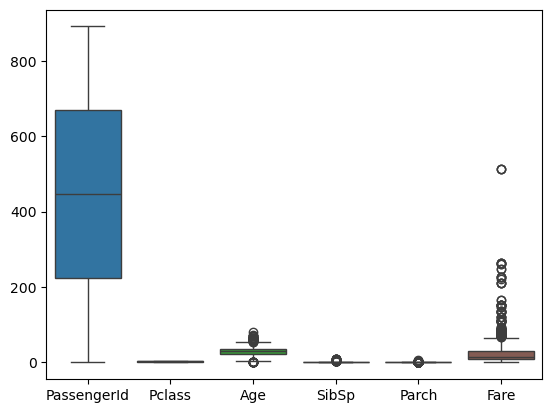

In [1256]:
sns.boxplot(data=df)

In [1257]:
q1_f = np.percentile(df['Fare'],25)
q3_f = np.percentile(df['Fare'],75)
iqr_f = q3_f - q1_f

In [1258]:
uf = q3_f + 1.5 * iqr_f
lf = q1_f - 1.5 * iqr_f

In [1259]:
print(uf)
print(lf)

65.6344
-26.724


In [1260]:
q1_a = np.percentile(df['Age'],25)
q3_a = np.percentile(df['Age'],75)
iqr_a = q3_a - q1_a

In [1261]:
ua = q3_a + 1.5 * iqr_a
la = q1_a - 1.5 * iqr_a

In [1262]:
print(ua)
print()

54.5



In [1263]:
df.loc[df['Fare'] > uf,'Fare'] = uf
df.loc[df['Fare'] < lf,'Fare'] = lf

In [1264]:
import math
df.loc[df['Age'] > ua,'Age'] = round(ua,0).astype(int)
df.loc[df['Age'] < la,'Age'] = math.ceil(la)

In [1265]:
print(math.trunc(la))

2


In [1266]:
df[df['Age'] < 2]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


<Axes: >

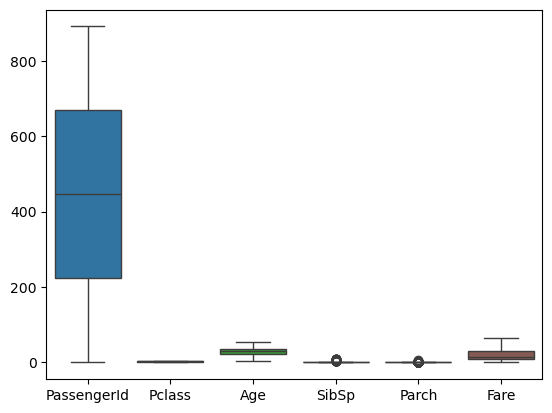

In [1267]:
sns.boxplot(data = df)

#### Due to they SibSp and Parch are the people count we are not making them in

### Feature Extraction

In [1268]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,No,3,"Braund, Mr. Owen Harris",male,22,1,0,A5 21171,7.2500,B96 B98,Southampton
1,2,Yes,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,65.6344,C85,Cherbourg
2,3,Yes,3,"Heikkinen, Miss. Laina",female,26,0,0,STONO2 3101282,7.9250,B96 B98,Southampton
3,4,Yes,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,Southampton
4,5,No,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,B96 B98,Southampton


##### Extracting surename

In [1269]:
def surename(x):
    data =''
    for i in x:
        if i == ',' :
            return data
        data += i

In [1270]:
df['Surename'] = df['Name'].apply(surename)

In [1271]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surename
0,1,No,3,"Braund, Mr. Owen Harris",male,22,1,0,A5 21171,7.2500,B96 B98,Southampton,Braund
1,2,Yes,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,65.6344,C85,Cherbourg,Cumings


In [1272]:
def title(x):
    try:
        return x.split(',')[1].split('.')[0].strip()
    except Exception:
        return ''

df['Title'] = df['Name'].apply(title)

In [1273]:
df.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [1274]:
# Mapping these titles with mr , miss, mrs, master
df['Title'] = df['Title'].map({
    'Mr' : 'Mr',
    'Mrs' : 'Mrs',
    'Miss' : 'Miss',
    'Master' : 'Master',
    'Don' :'Mr', 
    'Rev' : 'Rare', 
    'Dr' : 'Mr', 
    'Mme' :'Mrs', 
    'Ms' : 'Miss',
    'Major' : 'Mr', 
    'Lady' : 'Rare', 
    'Sir' : 'Mr', 
    'Mlle' : 'Mrs', 
    'Col' : 'Mr', 
    'Capt' : 'Mr', 
    'the Countess' : 'Rare', 
    'Jonkheer' : 'Mr'
})

In [1275]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surename,Title
0,1,No,3,"Braund, Mr. Owen Harris",male,22,1,0,A5 21171,7.2500,B96 B98,Southampton,Braund,Mr
1,2,Yes,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,65.6344,C85,Cherbourg,Cumings,Mrs
2,3,Yes,3,"Heikkinen, Miss. Laina",female,26,0,0,STONO2 3101282,7.9250,B96 B98,Southampton,Heikkinen,Miss
3,4,Yes,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,Southampton,Futrelle,Mrs
4,5,No,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,B96 B98,Southampton,Allen,Mr


In [1276]:
df['Name'].unique()

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth',
       'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan',
       'Vestrom, Miss. Hulda Amanda Adolfina',
       'Hewlett, Mrs. (Mary D Kingcome) ', 'Rice, Master. Eugene',
       'Williams, Mr. Charles Eugene',
       'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
       'Masselmani, Mrs. Fatima', 'Fynney, Mr. Joseph J',
       'Beesley, Mr. Lawrence', 'McGowan, Miss. Anna "Annie"',
       'Sloper, Mr. William Thompson', 'Palsson, Miss. Torborg Danira',
       'Asplund, Mrs. Carl Oscar 

In [1277]:
def firstname(x):
    if '(' in x :
        return x.split('.')[1].split('(')[0].strip()
    elif '"' in x :
        return x.split('.')[1].split('"')[0].strip()
    else :
        return x.split('.')[1].strip()

In [1278]:
df['Firstname'] = df['Name'].apply(firstname)

In [1279]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surename,Title,Firstname
0,1,No,3,"Braund, Mr. Owen Harris",male,22,1,0,A5 21171,7.2500,B96 B98,Southampton,Braund,Mr,Owen Harris
1,2,Yes,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,65.6344,C85,Cherbourg,Cumings,Mrs,John Bradley
2,3,Yes,3,"Heikkinen, Miss. Laina",female,26,0,0,STONO2 3101282,7.9250,B96 B98,Southampton,Heikkinen,Miss,Laina
3,4,Yes,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,Southampton,Futrelle,Mrs,Jacques Heath
4,5,No,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,B96 B98,Southampton,Allen,Mr,William Henry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,No,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,B96 B98,Southampton,Montvila,Rare,Juozas
887,888,Yes,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,B42,Southampton,Graham,Miss,Margaret Edith
888,889,No,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,30,1,2,WC 6607,23.4500,B96 B98,Southampton,Johnston,Miss,Catherine Helen
889,890,Yes,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C148,Cherbourg,Behr,Mr,Karl Howell


In [1280]:
def alias(x):
    if '(' in x:
        return x.split('(')[1].split(')')[0].strip()
    elif '"' in x :
        return x.split('"')[1].split('"')[0].strip()
    else  :
        return "No"
        

In [1281]:
df['Alias'] = df['Name'].apply(alias)

In [1282]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surename,Title,Firstname,Alias
0,1,No,3,"Braund, Mr. Owen Harris",male,22,1,0,A5 21171,7.2500,B96 B98,Southampton,Braund,Mr,Owen Harris,No
1,2,Yes,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,65.6344,C85,Cherbourg,Cumings,Mrs,John Bradley,Florence Briggs Thayer
2,3,Yes,3,"Heikkinen, Miss. Laina",female,26,0,0,STONO2 3101282,7.9250,B96 B98,Southampton,Heikkinen,Miss,Laina,No
3,4,Yes,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,Southampton,Futrelle,Mrs,Jacques Heath,Lily May Peel
4,5,No,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,B96 B98,Southampton,Allen,Mr,William Henry,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,No,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,B96 B98,Southampton,Montvila,Rare,Juozas,No
887,888,Yes,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,B42,Southampton,Graham,Miss,Margaret Edith,No
888,889,No,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,30,1,2,WC 6607,23.4500,B96 B98,Southampton,Johnston,Miss,Catherine Helen,Carrie
889,890,Yes,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C148,Cherbourg,Behr,Mr,Karl Howell,No


In [1283]:
# Ticket prefix
def tkt_prefix(x):
    if ' ' in x:
        return x.split(' ')[0]
    else:
        return 'NUM'

In [1284]:
df['Ticket Prefix'] = df['Ticket'].apply(tkt_prefix)

In [1285]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surename,Title,Firstname,Alias,Ticket Prefix
0,1,No,3,"Braund, Mr. Owen Harris",male,22,1,0,A5 21171,7.2500,B96 B98,Southampton,Braund,Mr,Owen Harris,No,A5
1,2,Yes,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,65.6344,C85,Cherbourg,Cumings,Mrs,John Bradley,Florence Briggs Thayer,PC
2,3,Yes,3,"Heikkinen, Miss. Laina",female,26,0,0,STONO2 3101282,7.9250,B96 B98,Southampton,Heikkinen,Miss,Laina,No,STONO2
3,4,Yes,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,Southampton,Futrelle,Mrs,Jacques Heath,Lily May Peel,NUM
4,5,No,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,B96 B98,Southampton,Allen,Mr,William Henry,No,NUM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,No,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,B96 B98,Southampton,Montvila,Rare,Juozas,No,NUM
887,888,Yes,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,B42,Southampton,Graham,Miss,Margaret Edith,No,NUM
888,889,No,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,30,1,2,WC 6607,23.4500,B96 B98,Southampton,Johnston,Miss,Catherine Helen,Carrie,WC
889,890,Yes,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C148,Cherbourg,Behr,Mr,Karl Howell,No,NUM


In [1286]:
def tkt_num(x):
    if ' ' in x:
        return x.split(' ')[1]
    else:
        return x

In [1287]:
df['Ticket Number'] = df['Ticket'].apply(tkt_num)

In [1288]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surename,Title,Firstname,Alias,Ticket Prefix,Ticket Number
0,1,No,3,"Braund, Mr. Owen Harris",male,22,1,0,A5 21171,7.2500,B96 B98,Southampton,Braund,Mr,Owen Harris,No,A5,21171
1,2,Yes,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,65.6344,C85,Cherbourg,Cumings,Mrs,John Bradley,Florence Briggs Thayer,PC,17599
2,3,Yes,3,"Heikkinen, Miss. Laina",female,26,0,0,STONO2 3101282,7.9250,B96 B98,Southampton,Heikkinen,Miss,Laina,No,STONO2,3101282
3,4,Yes,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,Southampton,Futrelle,Mrs,Jacques Heath,Lily May Peel,NUM,113803
4,5,No,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,B96 B98,Southampton,Allen,Mr,William Henry,No,NUM,373450


In [1289]:
family_size = df['Ticket'].value_counts().to_dict()

In [1290]:
df['Family Size'] = df['Ticket'].map(family_size)

In [1291]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surename,Title,Firstname,Alias,Ticket Prefix,Ticket Number,Family Size
0,1,No,3,"Braund, Mr. Owen Harris",male,22,1,0,A5 21171,7.2500,B96 B98,Southampton,Braund,Mr,Owen Harris,No,A5,21171,1
1,2,Yes,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,65.6344,C85,Cherbourg,Cumings,Mrs,John Bradley,Florence Briggs Thayer,PC,17599,1
2,3,Yes,3,"Heikkinen, Miss. Laina",female,26,0,0,STONO2 3101282,7.9250,B96 B98,Southampton,Heikkinen,Miss,Laina,No,STONO2,3101282,1
3,4,Yes,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,Southampton,Futrelle,Mrs,Jacques Heath,Lily May Peel,NUM,113803,2
4,5,No,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,B96 B98,Southampton,Allen,Mr,William Henry,No,NUM,373450,1


In [1292]:
# Droping unwanted columns
cols = ['Name','Ticket','SibSp','Parch']
df.drop(columns=cols,inplace=True)

In [1293]:
df

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Surename,Title,Firstname,Alias,Ticket Prefix,Ticket Number,Family Size
0,1,No,3,male,22,7.2500,B96 B98,Southampton,Braund,Mr,Owen Harris,No,A5,21171,1
1,2,Yes,1,female,38,65.6344,C85,Cherbourg,Cumings,Mrs,John Bradley,Florence Briggs Thayer,PC,17599,1
2,3,Yes,3,female,26,7.9250,B96 B98,Southampton,Heikkinen,Miss,Laina,No,STONO2,3101282,1
3,4,Yes,1,female,35,53.1000,C123,Southampton,Futrelle,Mrs,Jacques Heath,Lily May Peel,NUM,113803,2
4,5,No,3,male,35,8.0500,B96 B98,Southampton,Allen,Mr,William Henry,No,NUM,373450,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,No,2,male,27,13.0000,B96 B98,Southampton,Montvila,Rare,Juozas,No,NUM,211536,1
887,888,Yes,1,female,19,30.0000,B42,Southampton,Graham,Miss,Margaret Edith,No,NUM,112053,1
888,889,No,3,female,30,23.4500,B96 B98,Southampton,Johnston,Miss,Catherine Helen,Carrie,WC,6607,2
889,890,Yes,1,male,26,30.0000,C148,Cherbourg,Behr,Mr,Karl Howell,No,NUM,111369,1


In [1294]:
desired_order = ['PassengerId','Title','Firstname','Surename','Alias','Age','Sex','Family Size','Pclass','Ticket Prefix','Ticket Number','Cabin','Embarked','Fare','Survived']

In [1295]:
cleaned_df = df[desired_order]

In [1296]:
cleaned_df.rename(columns={
    'PassengerId' : 'Passenger Id',
    'Pclass' : 'Passenger Class',
    'Sex' : 'Gender',
    'Fare' : 'Paid Amount'
}, inplace= True)

In [1297]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Passenger Id     891 non-null    object 
 1   Title            891 non-null    object 
 2   Firstname        891 non-null    object 
 3   Surename         891 non-null    object 
 4   Alias            891 non-null    object 
 5   Age              891 non-null    int64  
 6   Gender           891 non-null    object 
 7   Family Size      891 non-null    int64  
 8   Passenger Class  891 non-null    int64  
 9   Ticket Prefix    891 non-null    object 
 10  Ticket Number    891 non-null    object 
 11  Cabin            891 non-null    object 
 12  Embarked         891 non-null    object 
 13  Paid Amount      891 non-null    float64
 14  Survived         891 non-null    object 
dtypes: float64(1), int64(3), object(11)
memory usage: 104.5+ KB


In [1298]:
cleaned_df['Passenger Class'] = cleaned_df['Passenger Class'].astype(object)

In [1299]:
cleaned_df['Paid Amount'] = round(cleaned_df['Paid Amount'],3)

In [1300]:
cleaned_df

,Passenger Id,Title,Firstname,Surename,Alias,Age,Gender,Family Size,Passenger Class,Ticket Prefix,Ticket Number,Cabin,Embarked,Paid Amount,Survived
0,1,Mr,Owen Harris,Braund,No,22,male,1,3,A5,21171,B96 B98,Southampton,7.250,No
1,2,Mrs,John Bradley,Cumings,Florence Briggs Thayer,38,female,1,1,PC,17599,C85,Cherbourg,65.634,Yes
2,3,Miss,Laina,Heikkinen,No,26,female,1,3,STONO2,3101282,B96 B98,Southampton,7.925,Yes
3,4,Mrs,Jacques Heath,Futrelle,Lily May Peel,35,female,2,1,NUM,113803,C123,Southampton,53.100,Yes
4,5,Mr,William Henry,Allen,No,35,male,1,3,NUM,373450,B96 B98,Southampton,8.050,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,Rare,Juozas,Montvila,No,27,male,1,2,NUM,211536,B96 B98,Southampton,13.000,No
887,888,Miss,Margaret Edith,Graham,No,19,female,1,1,NUM,112053,B42,Southampton,30.000,Yes
888,889,Miss,Catherine Helen,Johnston,Carrie,30,female,2,3,WC,6607,B96 B98,Southampton,23.450,No
889,890,Mr,Karl Howell,Behr,No,26,male,1,1,NUM,111369,C148,Cherbourg,30.000,Yes


In [1301]:
cleaned_df.to_csv('cleaned_titanic.csv')